# EECS16A: Homework 13

# Q5: Simulating a Discrete-Time LTI System

In this homework problem, we will explore a discrete-time LTI system defined by the following difference equation:

y[n] = 0.8 * y[n-1] - 0.15 * y[n-2] + x[n] + 0.5 * x[n-1]
with y[n] = 0 and x[n] = 0 for n < 0, unless otherwise specified.
We will use the following steps to explore its properties.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Part (a) - Impulse Response

In this part, we will write code to generate the impulse response h[n] of the system for n = 0, 1, ..., 50. 
We will choose the input x[n] = δ[n] (the unit impulse function). Then, we will plot h[n] versus n.

Let's begin by defining the system and plotting the impulse response.


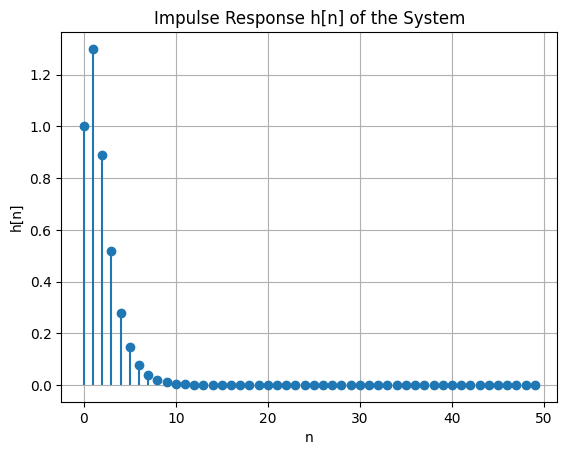

In [2]:
# x[n] = y[n] = 0 for n < 0
def system_response(x, n):
    y = np.zeros(n)
    for i in range(n):
        if i == 0:
            y[i] = x[i]
        elif i == 1:
            y[i] = 0.8 * y[i-1] + 0.5 * x[i-1] + x[i]
        else:
            y[i] = 0.8 * y[i-1] - 0.15 * y[i-2] + x[i] + 0.5 * x[i-1]  # Recursive equation
    return y

n = 50
# Define input as delta[n]
x = np.zeros(n)
x[0] = 1

y = system_response(x, n)

# Plot the impulse response
plt.stem(range(n), y, basefmt=" ")  # Corrected plot without `use_line_collection`
plt.title('Impulse Response h[n] of the System')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()


## Part (b) - Finite-Duration Input Response

Now, we will use the impulse response from Part (a) to compute the output y[n] for any finite-length input x[n].
We'll use the input x[n] = 1 for 0 ≤ n ≤ 100 and 0 otherwise. We will then compute the output using convolution and 
compare it with the direct computation using the system equation.


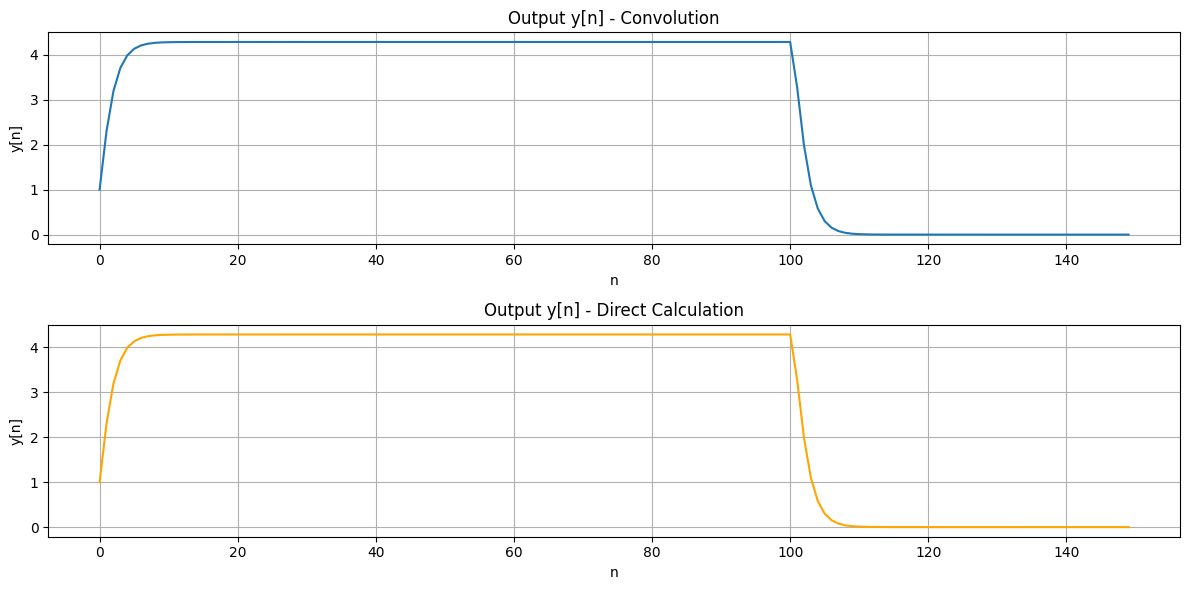

Max absolute difference: 1.0658141036401503e-14


In [3]:
# Define the finite-duration input x[n]
x_b = np.zeros(150)
x_b[:101] = 1  # Input: 1 for 0 <= n <= 100

# Compute output using convolution (implement yourself; don't use np.convolve)
y_conv = np.zeros(len(x_b))
for n_idx in range(len(x_b)):
    for k in range(min(n_idx + 1, len(y))):
        if n_idx - k < len(x_b):
            y_conv[n_idx] += x_b[n_idx - k] * y[k]

# Direct computation using system equation
y_lccde = system_response(x_b, len(x_b))

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(range(len(x_b)), y_conv, label='Convolution Result')
plt.title('Output y[n] - Convolution')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(len(x_b)), y_lccde, label='Direct Calculation', color='orange')
plt.title('Output y[n] - Direct Calculation')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.tight_layout()
plt.show()

max_diff = np.max(np.abs(y_conv - y_lccde))
print(f"Max absolute difference: {max_diff}")


## Part (c) - Frequency Response

We will now compute the frequency response of the system using the finite-length approximation from Part (a).
We will compute the frequency response \( H(e^{j\omega}) \) and plot it on a grid of frequencies.


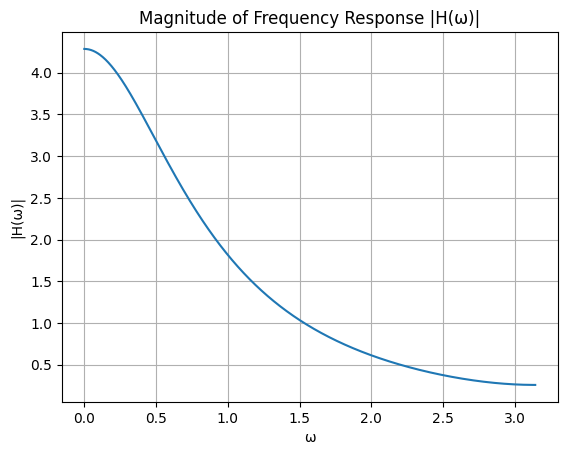

In [4]:
omega = np.linspace(0, np.pi, 1000)
H = np.zeros_like(omega, dtype=complex)

for i, w in enumerate(omega):
    H[i] = np.sum(y * np.exp(-1j * w * np.arange(n)))

# Plot the magnitude of the frequency response
plt.plot(omega, np.abs(H))
plt.title('Magnitude of Frequency Response |H(ω)|')
plt.xlabel('ω')
plt.ylabel('|H(ω)|')
plt.grid(True)
plt.show()


## Part (d) - Zero-State and Zero-Input Response

Finally, we will explore the zero-state and zero-input responses for n = 0, ..., 100, where we calculate:
1. The total response y_total[n] with initial conditions y[-1] = 1, y[-2] = -0.5.
2. The zero-state response yZSR[n] with initial conditions y[-1] = y[-2] = 0.
3. The zero-input response yZIR[n] with initial conditions y[-1] = 1, y[-2] = -0.5.


In [5]:
def custom_response(x, n, y_1, y_2):
    y = np.zeros(n)
    for i in range(n):
        if i == 0:
            y[i] = 0.8 * y_1 - 0.15 * y_2 + x[0]
        elif i == 1:
            y[i] = 0.8 * y[i-1] - 0.15 * y_1 + 0.5 * x[i-1] + x[i]
        else:
            y[i] = 0.8 * y[i-1] - 0.15 * y[i-2] + x[i] + 0.5 * x[i-1]
    return y

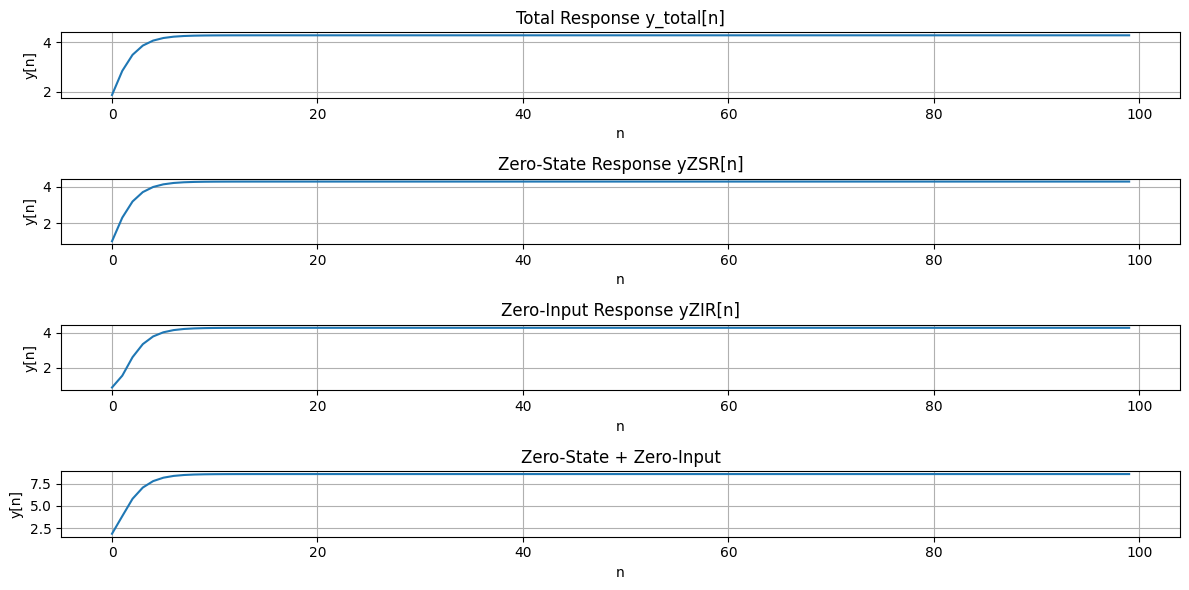

In [6]:
x = np.zeros(150)
x[:100] = 1
# Total Response Plot
y_total = custom_response(x, 100, 1, -0.5)

# Zero-State Response Plot
y_zsr = custom_response(x, 100, 0, 0)

x[0] = 0
# Zero-Input Response Plot
y_zir = custom_response(x, 100, 1, -0.5)

# Plot the responses
plt.figure(figsize=(12, 6))

# Total Response Plot
plt.subplot(4, 1, 1)
plt.plot(range(100), y_total, label='Total Response')
plt.title('Total Response y_total[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

# Zero-State Response Plot
plt.subplot(4, 1, 2)
plt.plot(range(100), y_zsr, label='Zero-State Response')
plt.title('Zero-State Response yZSR[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

# Zero-Input Response Plot
plt.subplot(4, 1, 3)
plt.plot(range(100), y_zir, label='Zero-Input Response')
plt.title('Zero-Input Response yZIR[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

# zero state plus zero input
plt.subplot(4, 1, 4)
plt.plot(range(100), y_zsr + y_zir, label='Zero-State + Zero-Input')
plt.title('Zero-State + Zero-Input')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)


plt.tight_layout()
plt.show()